In [146]:
import numpy as np
import matplotlib.pyplot as plt

In [147]:
# 读入训练数据
train = np.loadtxt('images2.csv', delimiter=',', skiprows=1)
train_x = train[:,:2]
train_y = train[:,2]

# 特征标准化（ x - 减去均值 / 标准差 )
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)
def standardize(x):
    return (x - mean) / std
train_x = standardize(train_x)
train_x

array([[-0.99163844,  1.10606278],
       [-0.54781896, -0.33533755],
       [-1.22348444, -0.74232117],
       [ 1.13472054,  0.69907916],
       [ 1.20758642,  0.92800744],
       [-0.46170474,  1.08910513],
       [ 0.61803518,  0.16491315],
       [ 1.20096225,  0.40232027],
       [ 0.83663283, -0.36077402],
       [-0.11062366, -0.69144821],
       [ 0.63790769,  1.1145416 ],
       [ 0.66440438, -0.01314218],
       [-0.33584548, -2.26850974],
       [ 1.28707648,  0.59733325],
       [ 0.50542427,  0.97040157],
       [-1.50169963, -1.17474126],
       [-0.2629796 , -1.60716136],
       [-1.83290819, -0.9203765 ],
       [-1.6010622 ,  1.45369462],
       [ 0.77701529, -0.41164697]])

In [148]:
# 逻辑回归函数
theta_0 = np.random.rand()
theta_1 = np.random.rand()
theta_2 = np.random.rand()
theta_3 = np.random.rand()
def f(x):
    return 1/(1+np.exp(-1*(theta_0+theta_1*x[:,0]+theta_2*x[:,1]+theta_3*x[:,0]**2)))

In [149]:
# 训练参数
learning_rate = 0.001
# 训练轮数
epoch = 10000

In [150]:
# 开始训练
for i in range(epoch):
    # 随机批量梯度
    idx = np.random.randint(0,len(train_x))
    x = train_x[idx:idx+4]
    y = train_y[idx:idx+4]
    
    tmp_theta_0 = theta_0 + learning_rate * np.sum((y-f(x))*1)
    tmp_theta_1 = theta_1 + learning_rate * np.sum((y-f(x))*x[:,0])
    tmp_theta_2 = theta_2 + learning_rate * np.sum((y-f(x))*x[:,1])
    tmp_theta_3 = theta_3 + learning_rate * np.sum((y-f(x))*x[:,0]**2)
    
    theta_0 = tmp_theta_0
    theta_1 = tmp_theta_1
    theta_2 = tmp_theta_2
    theta_3 = tmp_theta_3
    
    # 预测训练集
    predict_y = f(train_x)
    predict_y[predict_y>=0.5] = 1
    predict_y[predict_y<0.5] = 0
    
    # 计算准确率
    acc = (predict_y==train_y).sum() / len(train_y)
    
    # 计算精准率（预测为y=1的当中，有多少样本真的y=1呢？）
    precision = np.sum(train_y[predict_y==1]==1) / np.sum(predict_y==1)
    
    # 计算召回率（在所有y=1的样本中，模型预测为y=1的占多少？）
    recall = np.sum((predict_y==1) & (train_y==1)) / np.sum(train_y==1)
    
    # F1指标
    f1 = 2 / (1/precision + 1/recall)
    
    print('轮数:%d acc准确率:%.2f precision精确率:%.2f recall召回率:%.2f f1值:%.2f' % 
          (i, acc*100, precision*100, recall*100, f1*100))

轮数:0 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:1 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:2 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:3 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:4 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:5 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:6 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:7 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:8 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:9 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:10 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:11 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:12 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:13 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:14 acc准确率:45.00 precision精确率:50.00 recall召回率:72.73 f1值:59.26
轮数:15 acc准确率:45.00 precision精确率:50.00 recall召回率:72

轮数:946 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:947 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:948 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:949 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:950 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:951 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:952 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:953 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:954 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:955 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:956 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:957 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:958 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:959 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:960 acc准确率:80.00 precision精确率:73.33 recall召回率:100.00 f1值:84.62
轮数:961 acc

轮数:1893 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1894 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1895 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1896 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1897 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1898 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1899 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1900 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1901 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1902 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1903 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1904 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1905 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1906 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:1907 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:9

轮数:2841 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2842 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2843 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2844 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2845 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2846 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2847 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2848 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2849 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2850 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2851 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2852 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2853 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2854 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:2855 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:9

轮数:3790 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3791 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3792 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3793 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3794 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3795 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3796 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3797 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3798 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3799 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3800 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3801 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3802 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3803 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:3804 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:9

轮数:4725 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4726 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4727 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4728 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4729 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4730 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4731 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4732 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4733 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4734 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4735 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4736 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4737 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4738 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:4739 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:9

轮数:5671 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5672 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5673 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5674 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5675 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5676 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5677 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5678 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5679 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5680 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5681 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5682 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5683 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5684 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:91.67
轮数:5685 acc准确率:90.00 precision精确率:84.62 recall召回率:100.00 f1值:9

轮数:6621 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6622 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6623 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6624 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6625 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6626 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6627 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6628 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6629 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6630 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6631 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6632 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6633 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6634 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:6635 acc准确率:100.0

轮数:7561 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7562 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7563 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7564 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7565 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7566 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7567 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7568 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7569 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7570 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7571 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7572 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7573 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7574 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:7575 acc准确率:100.0

轮数:8507 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8508 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8509 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8510 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8511 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8512 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8513 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8514 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8515 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8516 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8517 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8518 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8519 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8520 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:8521 acc准确率:100.0

轮数:9457 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9458 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9459 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9460 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9461 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9462 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9463 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9464 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9465 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9466 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9467 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9468 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9469 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9470 acc准确率:100.00 precision精确率:100.00 recall召回率:100.00 f1值:100.00
轮数:9471 acc准确率:100.0

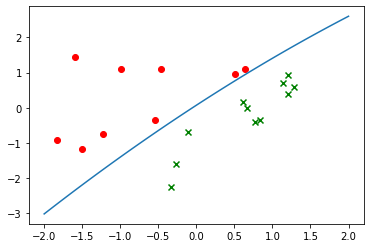

In [22]:
# 绘制决策边界  theta_0+theta_1*x1+theta_2*x2+theta_3*x1*x1 >= 0 是正类，否则负类
x1 = np.linspace(-2,2,100)
x2 = -(theta_0+theta_1*x1+theta_3*x1**2)/theta_2
plt.plot(x1,x2)
plt.scatter(train_x[train_y==0][:,0],train_x[train_y==0][:,1], c='red', marker='o')
plt.scatter(train_x[train_y==1][:,0],train_x[train_y==1][:,1], c='green', marker='x')